In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
#Data

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months'
home_b = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products'


CESM2 = xr.open_dataset(home + '/CESM2_land-hist_r1i1p1f1_200101-201212.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + '/CMCC-ESM2_land-hist_r1i1p1f1_200101-201212.nc'     , engine = 'netcdf4')
E3SM_1_1 = xr.open_dataset(home + '/E3SM-1-1_land-hist_r1i1p11f1_200101-201212.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + '/EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + '/HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + '/IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + '/MIROC6_land-hist_r1i1p1f1_200101-201212.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + '/UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212.nc' , engine = 'netcdf4')
DOLCE_v3_monthly_sg = xr.open_dataset(home_b + '/DOLCE_v3/DOLCE_v3_2001-2012_Same_grid.nc')
FBP_monthly_sg = xr.open_dataset(home_b + '/FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_Same_grid.nc')
Average = xr.open_dataset(home + '/LS3MIP_avg_200101_201212.nc' , engine = 'netcdf4')
Mean = xr.open_dataset(home + '/LS3MIP_mean_200101_201212.nc' , engine = 'netcdf4')

LM1_monthly = CESM2
LM2_monthly = CMCC_ESM2
LM3_monthly = E3SM_1_1
LM4_monthly = EC_Earth3_veg
LM5_monthly = HadGEM3_GC31_LL
LM6_monthly = IPSL_CM6A_LR
LM7_monthly = MIROC6
LM8_monthly = UKESM1_0_LL
LS3MIP_average = Average
LS3MIP_mean = Mean
DOLCE_v3 = DOLCE_v3_monthly_sg
FBP = FBP_monthly_sg

DATA_p = {'LS3MIP_Amon_CESM2':LM1_monthly , 'LM2':LM2_monthly , 'LM3':LM3_monthly , 'LM4':LM4_monthly , 'LM5':LM5_monthly , 'LM6':LM6_monthly ,  'LM7':LM7_monthly , 'LM8':LM8_monthly}
DATA = [LM1_monthly , LM2_monthly , LM3_monthly , LM4_monthly , LM5_monthly ,LM6_monthly ,LM7_monthly ,LM8_monthly]
Label = ['C2' , 'CE' , 'E3' , 'EE' , 'HG' ,'IP' ,'M6' ,'UK']
number_d = np.arange(1 , 9 , 1)

In [3]:
"""Dimensions"""

for i ,data in zip(number_d, DATA):
    #Characteristics
    print('-----'* 10)
    print(f'LM{i}')
    print('-----'* 10)
    print(data.dims)
    print(data.coords)
    print()

--------------------------------------------------
LM1
--------------------------------------------------
Frozen({'time': 144, 'bnds': 2, 'lon': 360, 'lat': 180})
Coordinates:
  * time     (time) object 2001-01-15 12:00:00 ... 2012-12-15 12:00:00
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

--------------------------------------------------
LM2
--------------------------------------------------
Frozen({'time': 144, 'bnds': 2, 'lon': 360, 'lat': 180})
Coordinates:
  * time     (time) object 2001-01-16 12:00:00 ... 2012-12-16 12:00:00
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

--------------------------------------------------
LM3
--------------------------------------------------
Frozen({'time': 144, 'bnds': 2, 'lon': 360, 'lat': 180})
Coordinates:
  * time    

In [4]:
"""Parameters"""

L_60 = [32  , 32 ,  60 , 42 , 24 , 24  , 21  , 24]
L_eq = [96  , 96 , 180 , 126 ,72 , 72  , 63  , 72]

"""Converting to mm/d"""
t_day = 86400 #seconds
factor = t_day

#NEW

"""Weighting"""

phi = np.deg2rad(LM1_monthly.lat)
weights = np.cos(phi)
LM1_monthly_weighted = weights * LM1_monthly.evspsbl

"""Removing Antarctica"""

LM1_monthly_weighted_Ant = LM1_monthly_weighted[: , : , :] * factor

"""-60 until 0 degrees"""

LM1_monthly_weighted_SH  = LM1_monthly_weighted[: , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM2_monthly.lat)
weights = np.cos(phi)
LM2_monthly_weighted = weights * LM2_monthly.evspsbl

"""Removing Antarctica"""

LM2_monthly_weighted_Ant = LM2_monthly_weighted[: , : , :] * factor

"""-60 until 0 degrees"""

LM2_monthly_weighted_SH  = LM2_monthly_weighted[: , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM3_monthly.lat)
weights = np.cos(phi)
LM3_monthly_weighted = weights * LM3_monthly.evspsbl

"""Removing Antarctica"""

LM3_monthly_weighted_Ant = LM3_monthly_weighted[: , : , :] * factor

"""-60 until 0 degrees"""

LM3_monthly_weighted_SH  = LM3_monthly_weighted[: , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM4_monthly.lat)
weights = np.cos(phi)
LM4_monthly_weighted = weights * LM4_monthly.evspsbl

"""Removing Antarctica"""

LM4_monthly_weighted_Ant = LM4_monthly_weighted[: , : , :] * factor

"""-60 until 0 degrees"""

LM4_monthly_weighted_SH  = LM4_monthly_weighted[: , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM5_monthly.lat)
weights = np.cos(phi)
LM5_monthly_weighted = weights * LM5_monthly.evspsbl

"""Removing Antarctica"""

LM5_monthly_weighted_Ant = LM5_monthly_weighted[: , : , :] * factor

"""-60 until 0 degrees"""

LM5_monthly_weighted_SH  = LM5_monthly_weighted[: , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM6_monthly.lat)
weights = np.cos(phi)
LM6_monthly_weighted = weights * LM6_monthly.evspsbl

"""Removing Antarctica"""

LM6_monthly_weighted_Ant = LM6_monthly_weighted[: , : , :] * factor

"""-60 until 0 degrees"""

LM6_monthly_weighted_SH  = LM6_monthly_weighted[: , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM7_monthly.lat)
weights = np.cos(phi)
LM7_monthly_weighted = weights * LM7_monthly.evspsbl

"""Removing Antarctica"""

LM7_monthly_weighted_Ant = LM7_monthly_weighted[: , : , :] * factor

"""-60 until 0 degrees"""

LM7_monthly_weighted_SH  = LM7_monthly_weighted[: , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM8_monthly.lat)
weights = np.cos(phi)
LM8_monthly_weighted = weights * LM8_monthly.evspsbl

"""Removing Antarctica"""

LM8_monthly_weighted_Ant = LM8_monthly_weighted[: , : , :] * factor

"""-60 until 0 degrees"""

LM8_monthly_weighted_SH  = LM8_monthly_weighted[: , : , :] * factor

#DOLCE v3

"""Weighting"""

phi = np.deg2rad(DOLCE_v3.lat)
weights = np.cos(phi)
DOLCE_v3_monthly_weighted = weights * DOLCE_v3.hfls

"""Converting to mm/d"""

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

"""Removing Antarctica"""

DOLCE_v3_monthly_weighted_Ant = DOLCE_v3_monthly_weighted[: , : , :] * factor

"""-60 until 0 degrees"""

DOLCE_v3_monthly_weighted_SH  = DOLCE_v3_monthly_weighted[: , : , :] * factor

#FBP

"""Weighting"""

phi = np.deg2rad(FBP.lat)
weights = np.cos(phi)
FBP_monthly_weighted = weights * FBP.Evaporation

"""-60 until 0 degrees"""

FBP_monthly_weighted_Ant  = FBP_monthly_weighted[: , : , :]


[26.66100609 25.3479952  29.87423159 33.21488015 40.65089533 45.73141418
 48.35261251 43.08696004 35.77519659 31.56952559 27.4145897  26.50484961]



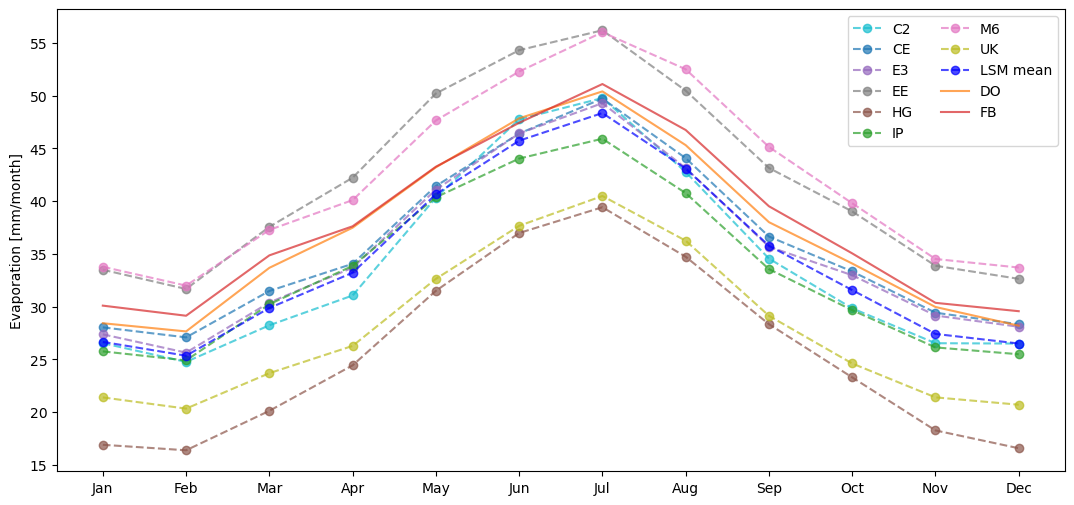

In [5]:
"""2001-2010"""

DATA = [LM1_monthly_weighted_Ant , LM2_monthly_weighted_Ant , LM3_monthly_weighted_Ant , LM4_monthly_weighted_Ant , LM5_monthly_weighted_Ant ,
        LM6_monthly_weighted_Ant ,LM7_monthly_weighted_Ant ,LM8_monthly_weighted_Ant]

plt.figure(figsize = (13 ,6 ))
#plt.title('Mean global monthly evaporation for the years between 2001 until 2010' , fontweight = 'bold')

t = 120
m_py = 12
n = 8 

Color = ['C1o--' , 'C2o--' , 'C3o--' , 'C4o--' , 'C5o--' , 'C6o--' , 'C7o--' , 'C8o--']
Color2 = ['C9o--' , 'C0o--' , 'C4o--' , 'C7o--', 'C5o--' , 'C2o--', 'C6o--' , 'C8o--']

Label = ['C2' , 'CE' , 'E3' , 'EE' , 'HG' ,'IP' ,'M6' ,'UK']

Monthly_mean_all = np.zeros((n , t))
Monthly_mean = np.zeros((n , m_py))
Combined = np.zeros(m_py)

dpm = [31, 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31]

for j in range(8):
    for i in range(t):
        masked = DATA[j][: , i , :] - FBP_monthly_weighted_Ant[: , i , :]*0.0000000001
        Monthly_mean_all[j][i] = masked.mean() * dpm[i]
        
    
for j in range(8):
    for i in range(12):
        Monthly_mean[j][i] = np.mean([Monthly_mean_all[j][i] , Monthly_mean_all[j][i + 12] , Monthly_mean_all[j][i + 24] ,  Monthly_mean_all[j][i+36] , 
        Monthly_mean_all[j][i + 48] , Monthly_mean_all[j][i + 60] , Monthly_mean_all[j][i + 72] , Monthly_mean_all[j][i + 84] , 
        Monthly_mean_all[j][i + 96] , Monthly_mean_all[j][i + 108]])
        Combined[i] = Monthly_mean[: , i].mean()
    plt.plot(np.arange(0 , m_py , 1) , Monthly_mean[j] , Color2[j] , alpha = 0.7 , label = Label[j]);
    
plt.plot(np.arange(0 , 12 , 1) , Combined , 'bo--' , alpha = 0.7 , label = 'LSM mean')
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
#plt.grid()
plt.legend()
#plt.xlabel('Month [-]')
plt.ylabel('Evaporation [mm/month]')

print()
print(Combined)
print()

"""DOLCE v3"""

DOLCE_v3_monthly_mean = np.zeros(12)
Monthly_mean_all_d = np.zeros(120)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all_d)):
    masked = DOLCE_v3_monthly_weighted_Ant[: , i , :] - FBP_monthly_weighted_Ant[: , i , :]*0.0000000001
    Monthly_mean_all_d[i] = masked.mean() * dpm[i]

for i in number_m:
    DOLCE_v3_monthly_mean[i] = np.mean([Monthly_mean_all_d[i] , Monthly_mean_all_d[i + 12] , Monthly_mean_all_d[i + 24] ,  Monthly_mean_all_d[i+36] , 
    Monthly_mean_all_d[i + 48] , Monthly_mean_all_d[i + 60] , Monthly_mean_all_d[i + 72] , Monthly_mean_all_d[i + 84] , 
    Monthly_mean_all_d[i + 96] , Monthly_mean_all_d[i + 108]])
    
plt.plot(np.arange(0 , 12 , 1) , DOLCE_v3_monthly_mean , 'C1' , label = 'DO' , alpha = 0.7)
plt.legend()

"""FBP"""

FBP_monthly_mean = np.zeros(12)
Monthly_mean_all_d = np.zeros(120)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all_d)):
    Monthly_mean_all_d[i] = FBP_monthly_weighted_Ant[: , i , :].mean() * dpm[i]

for i in number_m:
    FBP_monthly_mean[i] = np.mean([Monthly_mean_all_d[i] , Monthly_mean_all_d[i + 12] , Monthly_mean_all_d[i + 24] ,  Monthly_mean_all_d[i+36] , 
    Monthly_mean_all_d[i + 48] , Monthly_mean_all_d[i + 60] , Monthly_mean_all_d[i + 72] , Monthly_mean_all_d[i + 84] , 
    Monthly_mean_all_d[i + 96] , Monthly_mean_all_d[i + 108]])
    
plt.plot(np.arange(0 , 12 , 1) , FBP_monthly_mean , 'C3' , label = 'FB' , alpha = 0.7)
plt.legend(ncols = 2);

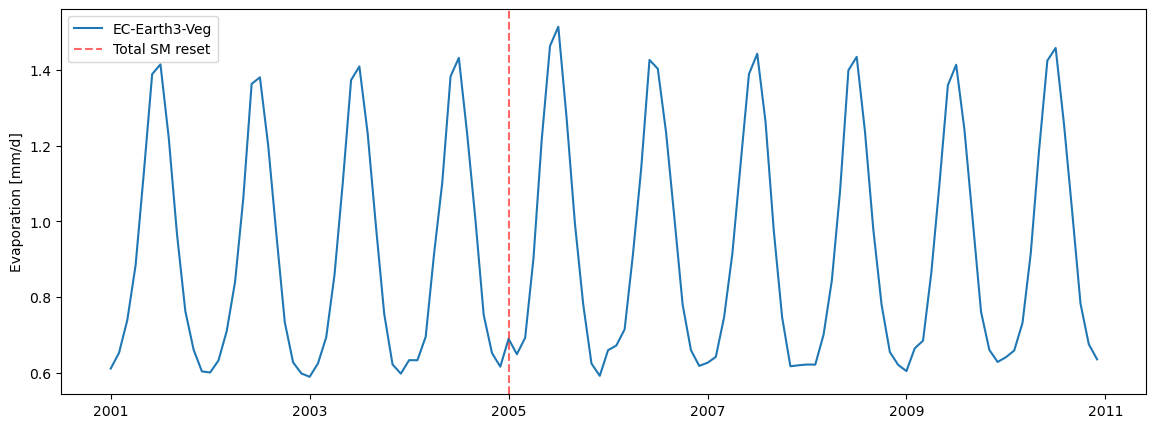

In [6]:
EE = xr.open_dataset(home + '/EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212.nc' , engine = 'netcdf4')


EE2 = np.zeros(120)

plt.figure(figsize = (14 , 5))

for i in range(len(EE2)):
    EE2[i] = EE.evspsbl[i].mean() * 86400
    
#plt.title('Global mean daily evaporation')
plt.ylabel('Evaporation [mm/d]')
plt.plot(EE2 , label = 'EC-Earth3-Veg')
plt.axvline(48 , linestyle = 'dashed' , color = 'red' , alpha = 0.6  , label = 'Total SM reset')
plt.legend()
plt.xticks([0 , 24 , 48 , 72 , 96 , 120] , ['2001' , '2003', '2005' , '2007' , '2009' , '2011']);

In [45]:
home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP_processed_files_ecearth'

EE_SM = xr.open_dataset(home + '/mean_mon_mrsol_Eday_EC-Earth3-Veg_land-hist_r1i1p1f1_185001-201412.nc' , engine = 'netcdf4')

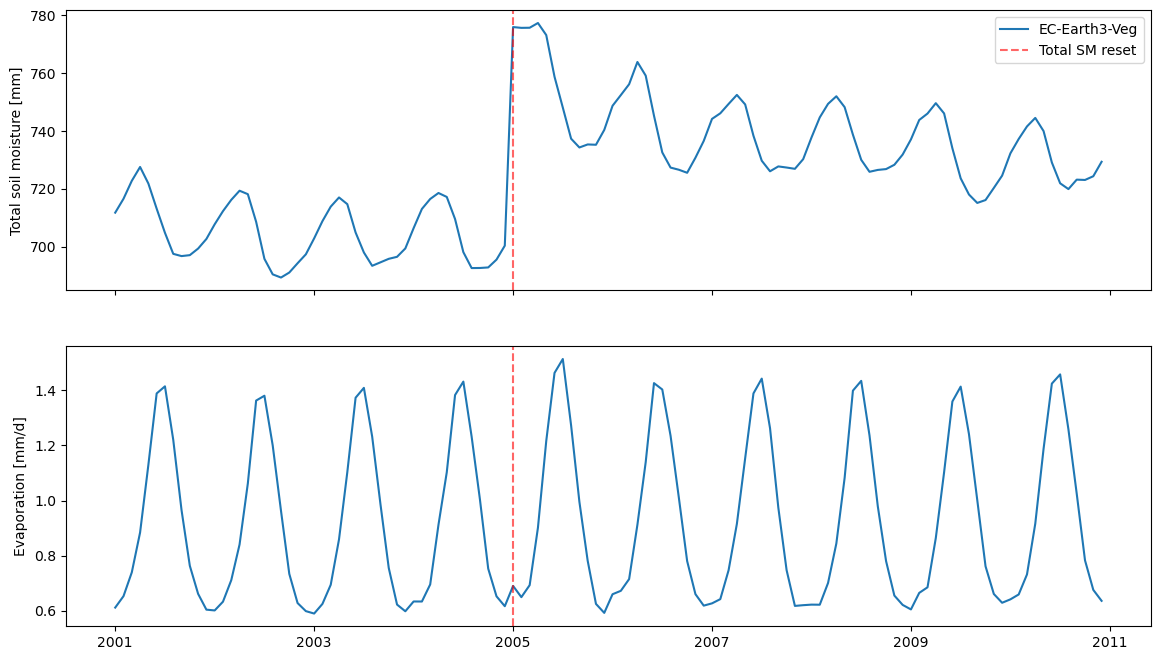

In [60]:
EESM = np.zeros(120)
plt.figure(figsize = (14 , 8))

for i in range(120):
    EESM[i] = EE_SM.mrsol[i + 1812].mean()
    
plt.subplot(211)
#plt.title('Global mean daily evaporation')
plt.ylabel('Total soil moisture [mm]')
plt.plot(EESM , label = 'EC-Earth3-Veg')
plt.axvline(48 , linestyle = 'dashed' , color = 'red' , alpha = 0.6  , label = 'Total SM reset')
plt.legend()
plt.xticks([0 , 24 , 48 , 72 , 96 , 120] , ['' , '', '' , '' , '' , '']);

plt.subplot(212)
plt.ylabel('Evaporation [mm/d]')
plt.plot(EE2)
plt.axvline(48 , linestyle = 'dashed' , color = 'red' , alpha = 0.6)
#plt.legend()
plt.xticks([0 , 24 , 48 , 72 , 96 , 120] , ['2001' , '2003', '2005' , '2007' , '2009' , '2011']);